In [22]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#### perform Some EDA On the dataset

In [23]:
df = pd.read_csv("content_based_recommendation_dataset.csv")
df.head()


,Number of clicks on similar products,Number of similar products purchased so far,Average rating given to similar products,Gender,Median purchasing price (in rupees),Rating of the product,Brand of the product,Customer review sentiment score (overall),Price of the product,Holiday,Season,Geographical locations,Probability for the product to be recommended to the person
0,12,4,4.2,male,500,4.5,PUMA,0.8,200,No,winter,plains,0.9
1,8,2,3.8,female,3000,3.2,Lee,-0.4,300,Yes,monsoon,mountains,0.2
2,25,10,4.5,female,600,4.8,Head Hunters,0.6,1000,No,spring,plains,0.7
3,6,1,2.1,female,100,2.5,Johnson & Johnson,0.1,300,No,summer,coastal,0.1
4,18,5,4.7,male,2000,4.3,Wakefit,0.9,700,Yes,winter,plains,0.8


In [24]:
df.shape

(1474, 13)

In [25]:
df.columns

Index(['Number of clicks on similar products',
       'Number of similar products purchased so far',
       'Average rating given to similar products', 'Gender',
       'Median purchasing price (in rupees)', 'Rating of the product',
       'Brand of the product', 'Customer review sentiment score (overall)',
       'Price of the product', 'Holiday', 'Season', 'Geographical locations',
       'Probability for the product to be recommended to the person'],
      dtype='object')

### Creating user_id and prodoct_id for ease 

In [26]:
df['product_id'] = df.index

# Assign a user_id to each row (treating each row as a unique user)
df['user_id'] = range(1, len(df) + 1)

df = df[["user_id","product_id","Number of clicks on similar products","Number of similar products purchased so far" , "Rating of the product" , "Gender" , "Median purchasing price (in rupees)" ,  "Price of the product" , "Holiday" , "Season" , "Probability for the product to be recommended to the person"]]

In [27]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Season,Probability for the product to be recommended to the person
0,1,0,12,4,4.5,male,500,200,No,winter,0.9
1,2,1,8,2,3.2,female,3000,300,Yes,monsoon,0.2
2,3,2,25,10,4.8,female,600,1000,No,spring,0.7
3,4,3,6,1,2.5,female,100,300,No,summer,0.1
4,5,4,18,5,4.3,male,2000,700,Yes,winter,0.8


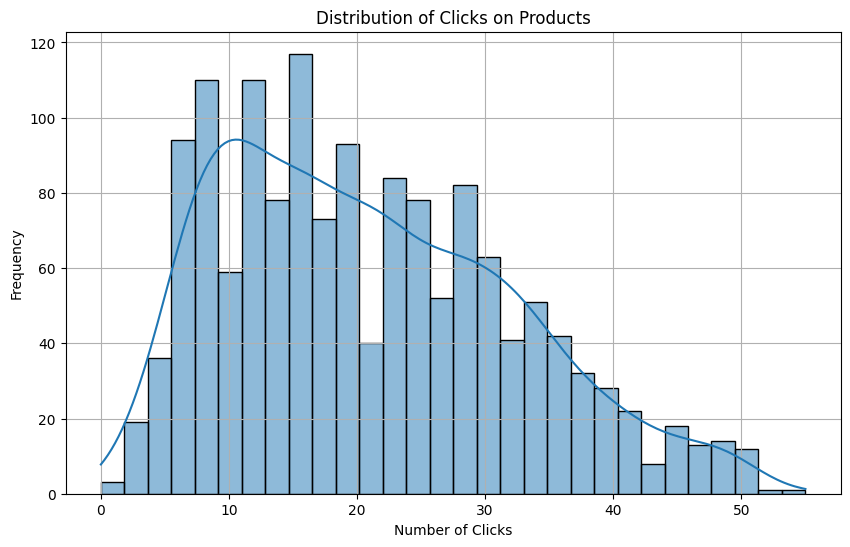

In [9]:
# Visualization: Distribution of Clicks on Products
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of clicks on similar products'], bins=30, kde=True)
plt.title('Distribution of Clicks on Products')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.grid()
plt.show()


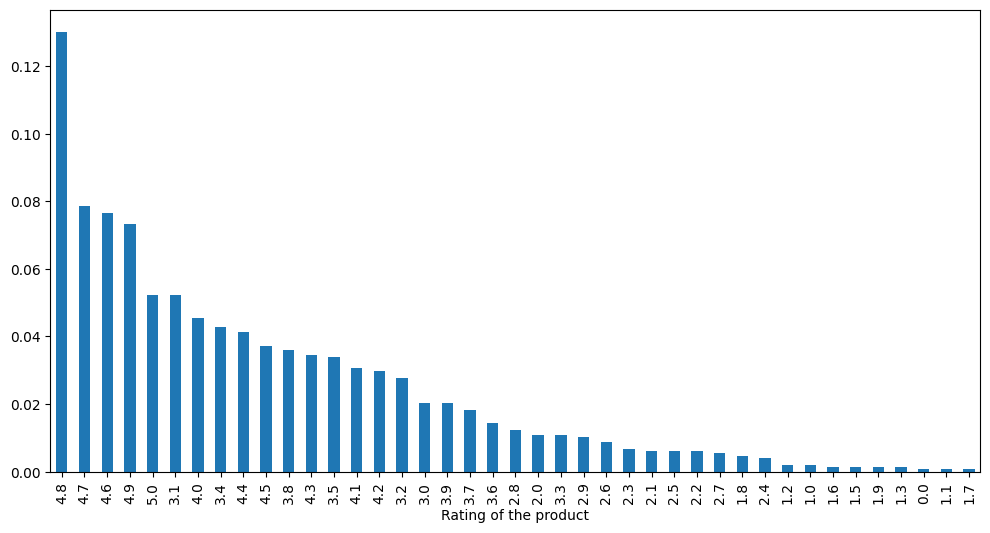

In [30]:
plt.figure(figsize = (12,6))
df['Rating of the product'].value_counts(1).plot(kind='bar')
plt.show()

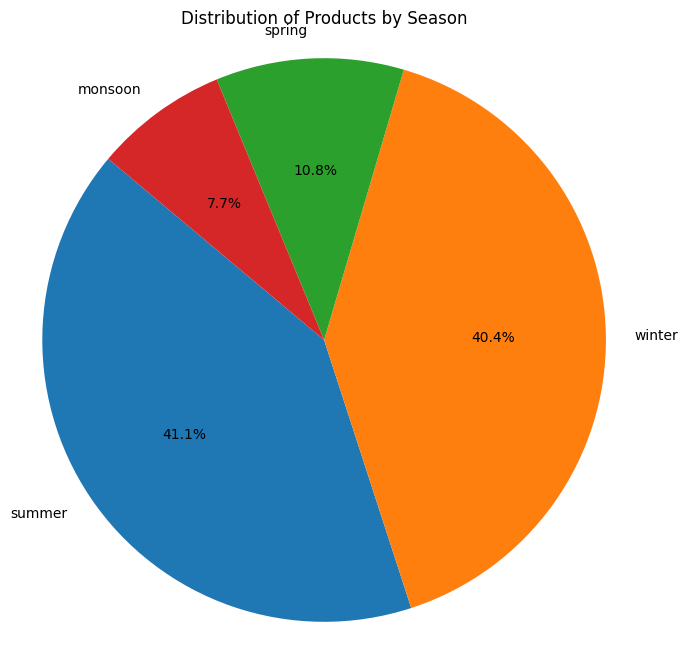

In [31]:
# Visualization: Pie Chart for Season Distribution
season_counts = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

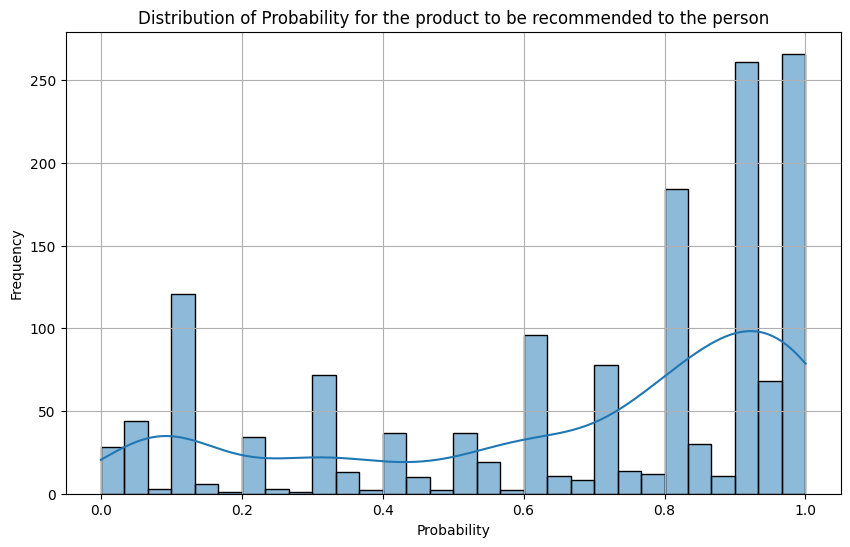

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Probability for the product to be recommended to the person'].astype(float), bins=30, kde=True)
plt.title('Distribution of Probability for the product to be recommended to the person')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid()
plt.show()




In [32]:
df.isnull().sum()

user_id                                                        0
product_id                                                     0
Number of clicks on similar products                           0
Number of similar products purchased so far                    0
Rating of the product                                          0
Gender                                                         0
Median purchasing price (in rupees)                            0
Price of the product                                           0
Holiday                                                        0
Season                                                         0
Probability for the product to be recommended to the person    0
dtype: int64

In [33]:
# Label Encoding
replacement_mapping = {
    "male" : 1,
    "female" : 0,
    "Yes" : 1,
    "No" : 0
}

df["Gender"] = df["Gender"].replace(replacement_mapping)
df["Holiday"] = df["Holiday"].replace(replacement_mapping)

C:\Users\Ojshav\AppData\Local\Temp\ipykernel_23208\2607334510.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace(replacement_mapping)
C:\Users\Ojshav\AppData\Local\Temp\ipykernel_23208\2607334510.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Holiday"] = df["Holiday"].replace(replacement_mapping)


In [34]:
# One Hot Encoding on Season

one_hot_encoded = pd.get_dummies(df['Season'], prefix='')
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop("Season", axis=1, inplace=True)

In [35]:
df.head()

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,_monsoon,_spring,_summer,_winter
0,1,0,12,4,4.5,1,500,200,0,0.9,0,0,0,1
1,2,1,8,2,3.2,0,3000,300,1,0.2,1,0,0,0
2,3,2,25,10,4.8,0,600,1000,0,0.7,0,1,0,0
3,4,3,6,1,2.5,0,100,300,0,0.1,0,0,1,0
4,5,4,18,5,4.3,1,2000,700,1,0.8,0,0,0,1


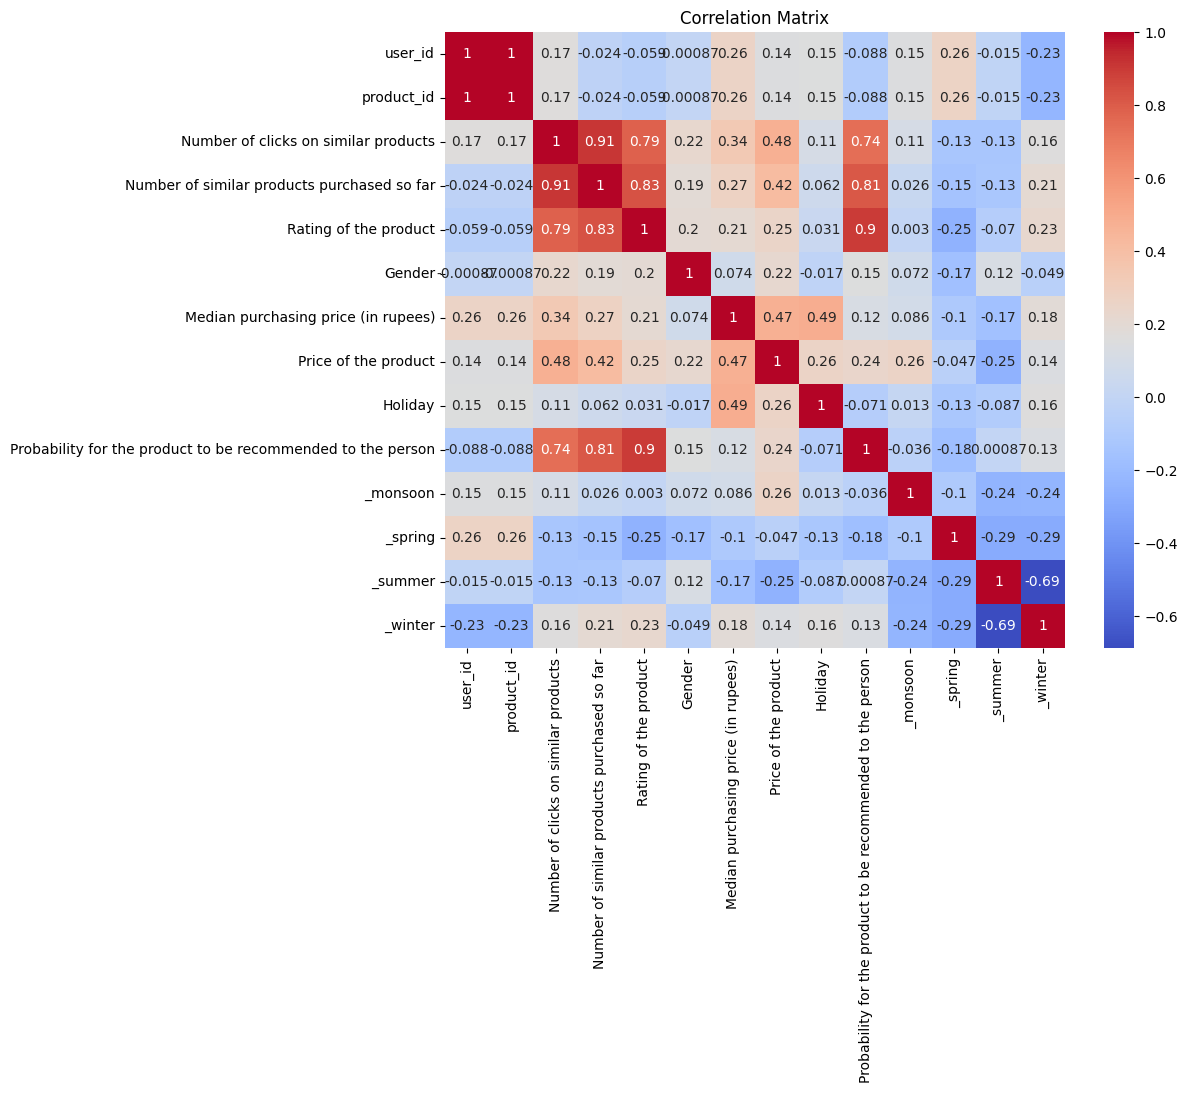

In [36]:
# Visualization: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
def rank_based_filtering(new_user_preferences, df):
    # Calculate scores based on user preferences
    df['score'] = (df['Number of clicks on similar products'] * new_user_preferences['click_weight'] +
                   df['Number of similar products purchased so far'] * new_user_preferences['purchase_weight'] +
                   df['Rating of the product'] * new_user_preferences['rating_weight'] +
                   df['Price of the product'].apply(lambda x: new_user_preferences['price_weight'] / (x + 1)))  # Avoid division by zero

    # Rank products based on the calculated score
    df['rank'] = df['score'].rank(ascending=False)

    # Return the top N recommended products
    return df.sort_values(by='rank').head(new_user_preferences['top_n'])


In [ ]:
### We can came up with a function to calculate the user 

In [17]:
new_user_preferences = {
    'click_weight': 0.4,
    'purchase_weight': 0.3,
    'rating_weight': 0.2,
    'price_weight': 0.1,
    'top_n': 5
}

recommended_products = rank_based_filtering(new_user_preferences, df)
recommended_products

,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,_monsoon,_spring,_summer,_winter,score,rank
1231,1232,1231,55,22,4.9,1,1100,1500,1,1.0,0,1,0,0,29.580067,1.0
1239,1240,1239,50,24,4.9,0,10500,1300,1,1.0,0,1,0,0,28.180077,2.0
1216,1217,1216,53,18,4.9,1,3500,1000,1,0.9,0,0,1,0,27.580100,3.0
1204,1205,1204,50,21,4.9,1,1000,1400,1,1.0,0,1,0,0,27.280071,4.0
1212,1213,1212,48,23,4.9,0,10000,1200,1,1.0,0,1,0,0,27.080083,5.0


,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,_monsoon,_spring,_summer,_winter,score,rank
0,1,0,12,4,4.5,1,500,200,0,0.90,0,0,0,1,6.900498,1081.0
1,2,1,8,2,3.2,0,3000,300,1,0.20,1,0,0,0,4.440332,1310.0
2,3,2,25,10,4.8,0,600,1000,0,0.70,0,1,0,0,13.960100,536.0
3,4,3,6,1,2.5,0,100,300,0,0.10,0,0,1,0,3.200332,1417.0
4,5,4,18,5,4.3,1,2000,700,1,0.80,0,0,0,1,9.560143,891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1470,1469,5,1,2.0,1,200,300,1,0.01,0,1,0,0,2.700332,1435.0
1470,1471,1470,37,13,4.6,0,900,600,0,0.77,0,0,1,0,19.620166,188.0
1471,1472,1471,22,8,4.1,1,4000,900,1,0.76,0,0,0,1,12.020111,671.0
1472,1473,1472,40,15,4.9,0,700,500,0,0.82,0,0,1,0,21.480200,111.0


,user_id,product_id,Number of clicks on similar products,Number of similar products purchased so far,Rating of the product,Gender,Median purchasing price (in rupees),Price of the product,Holiday,Probability for the product to be recommended to the person,_monsoon,_spring,_summer,_winter,score
0,1,0,12,4,4.5,1,500,200,0,0.9,0,0,0,1,6.900498
1,2,1,8,2,3.2,0,3000,300,1,0.2,1,0,0,0,4.440332
2,3,2,25,10,4.8,0,600,1000,0,0.7,0,1,0,0,13.960100
3,4,3,6,1,2.5,0,100,300,0,0.1,0,0,1,0,3.200332
4,5,4,18,5,4.3,1,2000,700,1,0.8,0,0,0,1,9.560143
